In [ ]:
#Simple EDA on Taxi data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
df = pd.read_csv(r"D:\DATA\Project\8420\Taxi_data_clean.csv")

In [3]:
#Column names
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'trip_duration_min', 'day_of_week', 'month', 'year', 'pickup_hour',
       'dropoff_hour', 'time_of_day', 'PU_Borough', 'DO_Borough',
       'is_airport_trip', 'is_cbd_congestion', 'has_extra', 'has_toll',
       'has_congestion_surcharge', 'fare_amount'],
      dtype='object')

In [4]:
#Column types
df.dtypes

VendorID                      int64
passenger_count             float64
trip_distance               float64
RatecodeID                  float64
trip_duration_min           float64
day_of_week                  object
month                        object
year                          int64
pickup_hour                   int64
dropoff_hour                  int64
time_of_day                  object
PU_Borough                   object
DO_Borough                   object
is_airport_trip               int64
is_cbd_congestion             int64
has_extra                     int64
has_toll                      int64
has_congestion_surcharge      int64
fare_amount                 float64
dtype: object

In [5]:
#Shape
df.shape

(14715034, 19)

In [6]:
#Looking at fare stats
df['fare_amount'].describe()

count   14,715,034.00
mean            20.64
std             16.90
min              3.00
25%             10.00
50%             14.20
75%             22.60
max            500.00
Name: fare_amount, dtype: float64

In [7]:
#Some descriptive stats of numerical variable
num = df.select_dtypes(include = ['int64','float64']).columns
df[num].describe()

,VendorID,passenger_count,trip_distance,RatecodeID,trip_duration_min,year,pickup_hour,dropoff_hour,is_airport_trip,is_cbd_congestion,has_extra,has_toll,has_congestion_surcharge,fare_amount
count,"14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00","14,715,034.00"
mean,1.80,1.32,3.61,1.07,17.79,"2,025.00",14.55,14.61,0.10,0.79,0.60,0.08,0.94,20.64
std,0.40,0.73,4.40,0.38,13.02,0.01,5.63,5.76,0.30,0.40,0.49,0.28,0.24,16.90
min,1.00,1.00,0.01,1.00,5.00,"2,009.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
25%,2.00,1.00,1.20,1.00,9.12,"2,025.00",11.00,11.00,0.00,1.00,0.00,0.00,1.00,10.00
50%,2.00,1.00,1.90,1.00,13.82,"2,025.00",15.00,15.00,0.00,1.00,1.00,0.00,1.00,14.20
75%,2.00,1.00,3.58,1.00,21.63,"2,025.00",19.00,19.00,0.00,1.00,1.00,0.00,1.00,22.60
max,2.00,9.00,93.60,6.00,100.00,"2,025.00",23.00,23.00,1.00,1.00,1.00,1.00,1.00,500.00


In [8]:
#Nothing out of the ordinary, stats looks realistic.

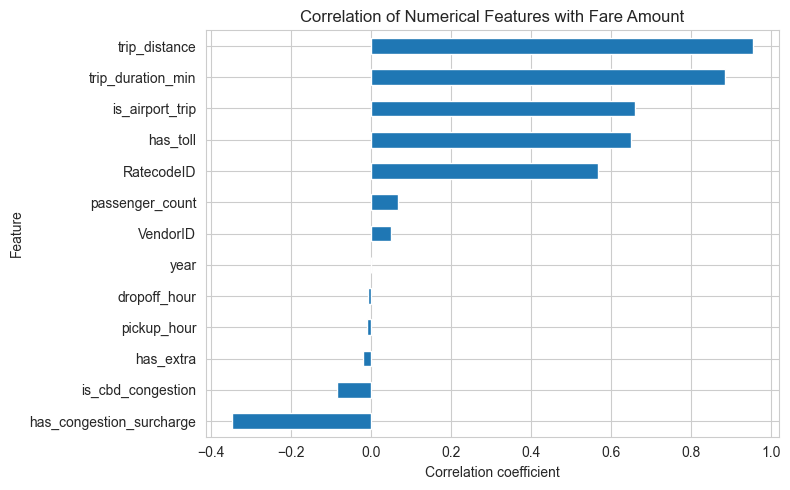

In [9]:
#EDA

#Correaltion of each numeric variable with fare
num = num = ['VendorID','passenger_count','trip_distance','RatecodeID','trip_duration_min','year','pickup_hour','dropoff_hour','is_airport_trip','is_cbd_congestion','has_extra','has_toll','has_congestion_surcharge','fare_amount']
corr_matrix = df[num].corr()

corr_with_fare = corr_matrix['fare_amount'].sort_values().drop('fare_amount')

plt.figure(figsize=(8, 5))
corr_with_fare.plot(kind='barh')
plt.title('Correlation of Numerical Features with Fare Amount')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()




In [10]:
#"trip_distance" and "trip_duration_min" make sense as fare is calculated as follows: base rate + charges per distance and time (duration).
#Interestingly, "is_airport_trip", "has_toll", and "RatecodeID" have a decent correlation strength.

#Possible reasons:

#"RatecodeID" specifies the pricing scheme applied to the trip (e.g., standard, airport, negotiated), which influences how the final rate is calculated.
#"has_toll" indicates that the trip involved toll roads or bridges, which adds to the fare, hence the relatively strong correlation.
#"is_airport_trip" indicates if the trip was either from or to the airport. It has its own pricing rules and can even include surcharges, leading to higher fares. Therefore, it has a strong correlation.

In [11]:
#Categorical variable

<Figure size 800x500 with 0 Axes>

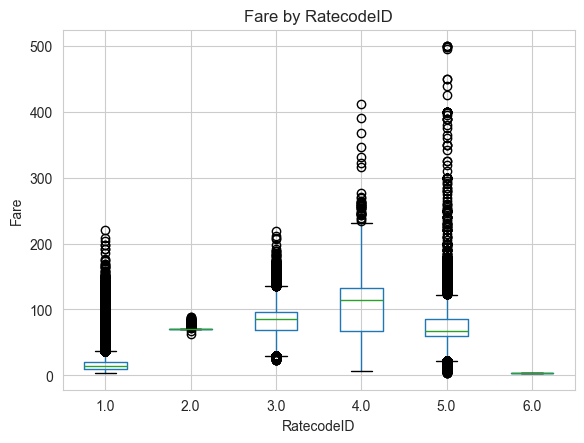

In [12]:
#Box plot - Looking more into pricing schemes

plt.figure(figsize=(8, 5))
df.boxplot(column='fare_amount', by='RatecodeID')
plt.title('Fare by RatecodeID')
plt.suptitle('')
plt.xlabel('RatecodeID')
plt.ylabel('Fare')
plt.show()

In [13]:
#Standard (1) - These trips have low variance and a low median fare, as they represent normal rides with predictable pricing. However, there are some outliers, likely due to heavy traffic or unusually long rides across boroughs.

#JFK (2) - There is almost no variance in fares, meaning prices are mostly the same. Small variations occur depending on the borough from where the trip starts or due to additional charges. The median fare represents a very accurate typical JFK trip.

#Newark (3) - Compared to JFK, fares show more variance, though still relatively small. Trips to Newark are generally longer, resulting in higher fares. Toll roads and traffic could explain the upper outliers. Interestingly, the lower whisker shows a few outliers, which may represent very short trips or rides that were cut short.

#Nassau or Westchester (4) - These suburban trips are usually longer and often involve more tolls than standard trips, leading to higher fares and greater variance. Peak-hour congestion and heavy traffic can further increase fares.

#Negotiated (5) - These trips don’t have much variance in most of the fares, but there are many outliers. Fares often reach higher amounts than other trip types, likely due to corporate or special agreements, such as limousine services or tour-like rides around New York.

#Group rides (6) - The box for group rides is collapsed with no visible outliers or variance. This likely reflects the very low prevalence of group rides in the dataset.

<Figure size 800x500 with 0 Axes>

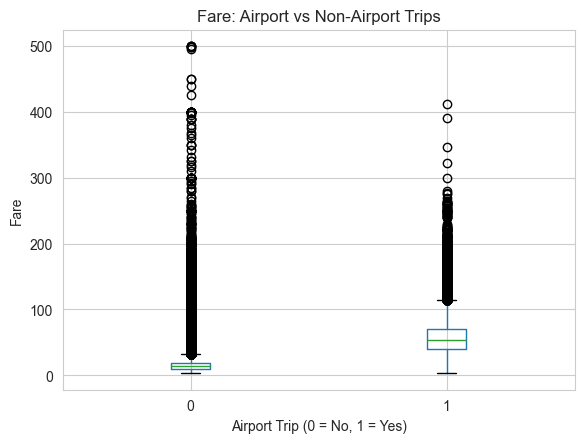

In [14]:
#Air port trips vs non-air port trips
plt.figure(figsize=(8, 5))
df.boxplot(column='fare_amount', by='is_airport_trip')
plt.title('Fare: Airport vs Non-Airport Trips')
plt.suptitle('')
plt.xlabel('Airport Trip (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

In [15]:
#Airport trips, while mostly fixed, have different rates and additional surcharges, which explains the higher median and wider spread (variance) in fares. The outliers are likely due to peak-hour congestion and tolls.

#Non-airport trips, on the other hand, are generally cheaper, with fares that are often very similar. However, they have many high outliers, indicating that many non-airport trips include service-based rides, such as limo services, tours, or longer-distance trips.

<Figure size 800x500 with 0 Axes>

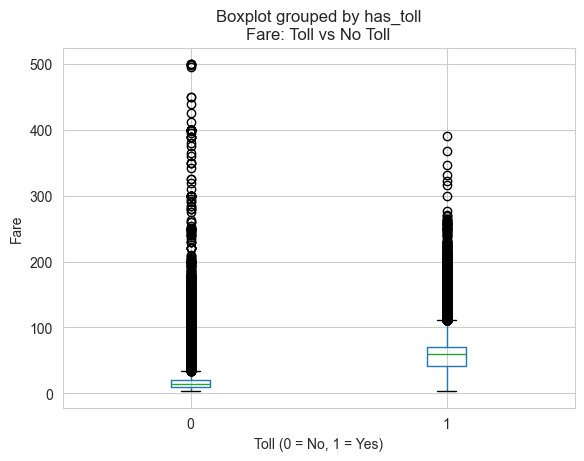

In [16]:
#Toll vs non-toll trips
plt.figure(figsize=(8, 5))
df.boxplot(column='fare_amount', by='has_toll')
plt.title('Fare: Toll vs No Toll')

plt.xlabel('Toll (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

In [17]:
#Non-toll trips are generally cheaper, with very similar fares. However, there are many high outliers, likely due to longer trips, heavy traffic, or service-based rides such as tours or limo services.

# Tolls have an impact on fare prices, usually resulting in increases. The variance in fares may reflect different toll fees on various roads or changes in toll fees throughout the day.

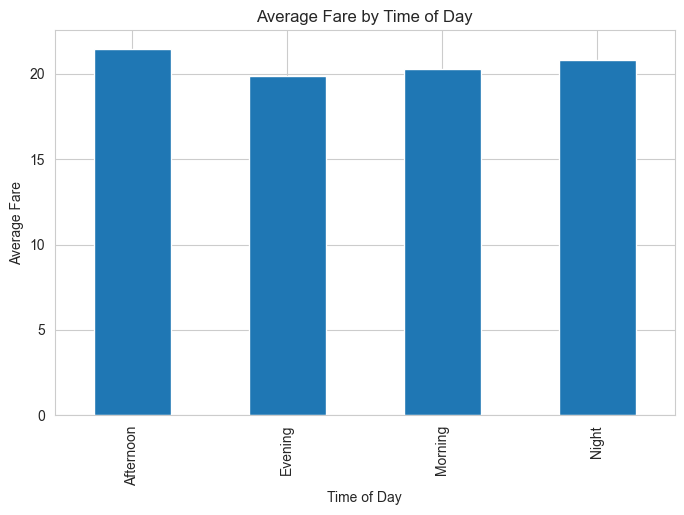

In [18]:
#Fare affected by time of day ?
fare_by_time = df.groupby('time_of_day')['fare_amount'].mean()
plt.figure(figsize=(8, 5))
fare_by_time.plot(kind='bar')
plt.title('Average Fare by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Fare')
plt.show()

In [19]:
#The difference in fare amounts across times of day is quite small. Fares tend to be slightly higher in the afternoon, likely due to people commuting home from work, which increases traffic congestion and, in turn, results in higher fare charges.

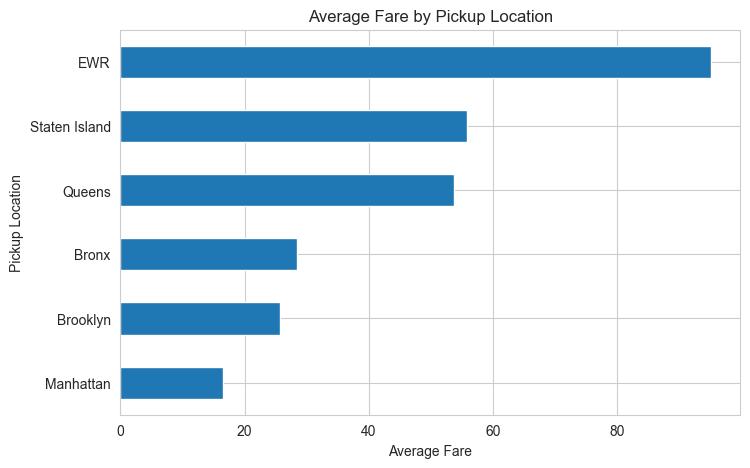

In [20]:
#Fares by pickup location
fare_by_borough = df.groupby('PU_Borough')['fare_amount'].mean().sort_values()
plt.figure(figsize=(8, 5))
fare_by_borough.plot(kind='barh')
plt.title('Average Fare by Pickup Location')
plt.xlabel('Average Fare')
plt.ylabel('Pickup Location')
plt.show()

In [28]:
count = df.groupby(df['PU_Borough']).size().rename('row_count')
count

PU_Borough
Bronx                5789
Brooklyn            65060
EWR                    82
Manhattan        13051011
Queens            1593007
Staten Island          85
Name: row_count, dtype: int64

In [21]:
#EWR has the highest average fare since the distance from the airport is relatively long. Since these are "airport" trips, they follow a different pricing rate compared to others.

#Staten Island trips have higher fares, likely because they are often longer, go through central Manhattan (facing heavy congestion) to get to other boroughs farther away.

#Queens, being the largest borough, also tends to have longer trips, resulting in higher fares.

#Bronx, Brooklyn, and Manhattan trips have lower trip fares, which is confusing considering they have the highest taxi usage. Possible explanations are that trips are shorter, trips stay within the same borough, or their road networks reduce the average distance.


In [ ]:
#Not alot of trips start from Staten Island and EWR, but they could be useful when combined with DO_Borough.

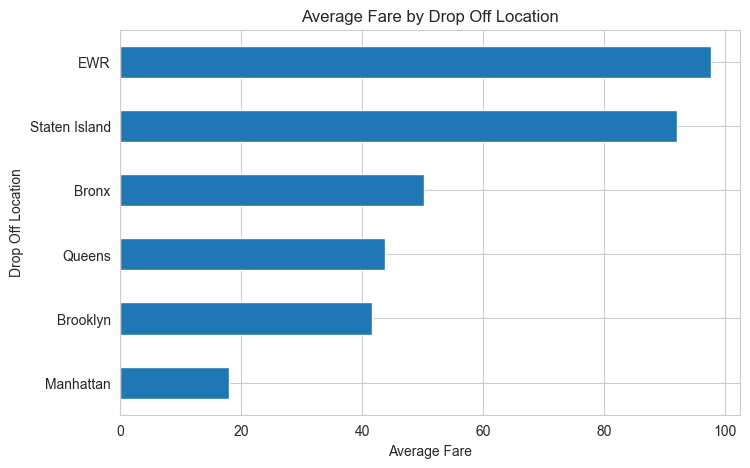

In [22]:
#Fares by drop off
fare_by_borough = df.groupby('DO_Borough')['fare_amount'].mean().sort_values()
plt.figure(figsize=(8, 5))
fare_by_borough.plot(kind='barh')
plt.title('Average Fare by Drop Off Location')
plt.xlabel('Average Fare')
plt.ylabel('Drop Off Location')
plt.show()

In [29]:
count = df.groupby(df['DO_Borough']).size().rename('row_count')
count

DO_Borough
Bronx               69730
Brooklyn           617505
EWR                 36975
Manhattan        13231769
Queens             755138
Staten Island        3917
Name: row_count, dtype: int64

In [ ]:
#EWR has the highest average fare since the distance to the airport is relatively long. Since these are "airport" trips, they follow a different pricing rate compared to others.

#Staten Island trips have higher fares, likely because they are often longer, and have to go through central Manhattan (facing heavy congestion) to get to Staten Island.

#Bronx, Queens, and Brooklyn fall in the middle range, suggesting a mix of short local trips or long cross borough trips.

#Manhattan has the lowest average fare. Possible explanations are that trips are shorter, trips stay within the same borough, or their road networks reduce the average distance.

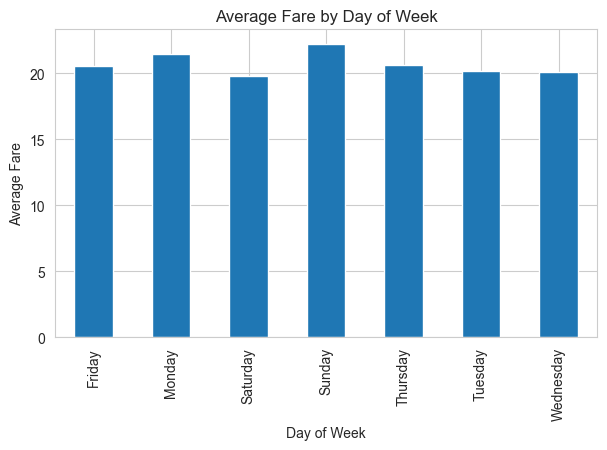

In [23]:

fare_by_day = df.groupby('day_of_week')['fare_amount'].mean()

fare_by_day.plot(kind='bar', figsize=(7, 4))
plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare')
plt.show()

In [ ]:
#There is small variation across the days of the week, but it is not as drastic I hoped it to be.

#Meaning it has a weak predictive power when on its own.

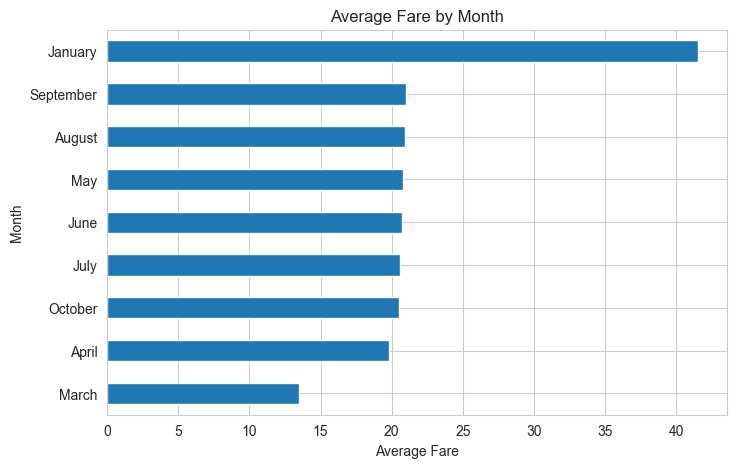

In [24]:
#Fares by Month
fare_by_borough = df.groupby('month')['fare_amount'].mean().sort_values()
plt.figure(figsize=(8, 5))
fare_by_borough.plot(kind='barh')
plt.title('Average Fare by Month')
plt.xlabel('Average Fare')
plt.ylabel('Month')
plt.show()

In [27]:
rows_per_month = (df.groupby(df['month']).size().rename('row_count'))
rows_per_month

month
April        2614384
August       2090917
January            2
July         2252710
June         2474001
March              4
May          2743705
October            1
September    2539310
Name: row_count, dtype: int64

In [ ]:
#The average fare across most months remains relatively stable, ranging between $19-$22. Interestingly, January appears to have the highest average fare, but its due to only having 2 high fare trips.

#Just like days of the week, month seems to have a week weak predictive power.

In [25]:
#From the EDA done above, trip_distance, trip_duration_min, is_airport_trip, has_toll, RatecodeID, DO_Borough and PU_Borough seem to play major role in predicting fare prices.